# Homework 4

In [433]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import sqlite3 as sql
import re

## Joining data 

In [376]:
#copy+paste from HW3
phone_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv') 

pd.set_option('future.no_silent_downcasting', True) #smth an error message told me to enter

clean_phone_df = phone_df.copy() 

for n in range(len(clean_phone_df)): #replacing first year-column value with 0.0 if it's NaN so I can forward fill 
    if np.isnan(clean_phone_df.loc[n, '1960']):
        clean_phone_df.loc[n, '1960'] = 0.0
    else:
        continue

clean_phone_df = clean_phone_df.ffill(axis=1)

clean_phone_df.iloc[:,1:] = (clean_phone_df\
                            .iloc[:,1:]\
                            .replace({'k':'e3', 'M':'e6', 'B':'e9'}, regex = True))\
                            .astype(float) #does not turn the chosen columns to floats for some reason? 

#turning relevant columns to floats

as_numerical = clean_phone_df.iloc[:,1:].astype(float)

clean_phone_df = pd.concat([clean_phone_df.iloc[:, 0:1], as_numerical], axis=1)
clean_phone_df

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0
210,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11100000.0,11700000.0,13900000.0,16800000.0,17100000.0,15000000.0,16400000.0,15400000.0,15300000.0,15300000.0
211,ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50400000.0,64000000.0,68400000.0,76900000.0,79300000.0,88000000.0,82400000.0,88500000.0,92400000.0,97000000.0
212,ZMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5450000.0,8160000.0,10500000.0,10400000.0,10100000.0,11600000.0,12000000.0,13400000.0,15500000.0,17200000.0


In [377]:
pop_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/pop_data.csv')

#dealing with missing values
for n in range(len(pop_df)): #replacing last year-column value with 0.0 if it's NaN so I can backward fill 
    if np.isnan(pop_df.loc[n, '2020']):
        pop_df.loc[n, '2020'] = 0.0
    else:
        continue
clean_pop_df = pop_df.bfill(axis=1).iloc[:,1:] #bye bye first column with numerical index 
clean_pop_df

,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
262,YEM,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,...,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
263,ZAF,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,...,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
264,ZMB,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,...,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0


I chose to backward fill the population df as opposed to the forward fill I used for phones. This is because it's weird that a population goes from 0 to a number in the thousands from one year to another. Also, I do not want to divide with zero. 

First we make a similar table to the first one in the instructions. 

In [379]:
#reshaping dfs with melt not pivot bcos I couldn't reference to the years using pivot
melt_phone_df = clean_phone_df.melt(id_vars='iso-3', var_name='year', value_name='n_cellphones')
melt_pop_df = clean_pop_df.melt(id_vars='iso-3', var_name='year', value_name='population')



#joining
cell_pop_df = melt_phone_df.merge(melt_pop_df, on = ['iso-3', 'year'])
cell_pop_df.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,AFG,1960,0.0,8622466.0
2,AGO,1960,0.0,5357195.0
3,ALB,1960,0.0,1608800.0
4,AND,1960,0.0,9443.0


Next we make a similar table to the second table in the instructions. 

In [381]:
country_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/country_data.csv')\
            .rename(columns = {'alpha-3':'iso-3'})

cell_pop_country_df = cell_pop_df.merge(country_df, on = ['iso-3']) #join previous df with countries to get country names

cell_pop_country_df = cell_pop_country_df[['year', 'name', 'n_cellphones', 'population']] #pick relevant columns

cell_pop_country_df['cell_per_pop'] = cell_pop_country_df['n_cellphones'] / cell_pop_country_df['population'] #add phones/person column

cell_pop_country_df = cell_pop_country_df.pivot(columns = 'name', index = 'year', values = 'cell_per_pop') #pivot to make the table look like 
#the instructions

cell_pop_country_df\
    .sort_values('2019', axis = 1, ascending = False)\
    .tail()\
    .iloc[:,:5] #display the countries with highest number of cell phones per capita in 2019.

name,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2015,3.088231,2.290401,2.007424,1.956838,1.58426
2016,3.14351,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.8499
2019,3.284849,2.86365,2.127739,1.99746,1.987196


We now create a plot that illustrates the growth rate of the countries in the table above but over the last 10 years. Growth rate is defined as 
$\frac{value_{2019}-value_{2010}}{value_{2010}}$ but one does not need to plot these to find the country with the greatest growth rate so below is my best guess of what you mean...

<Axes: xlabel='year'>

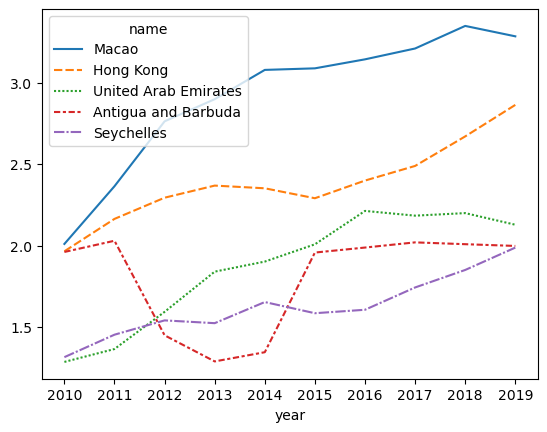

In [383]:
last10ys = cell_pop_country_df\
            .sort_values('2019', axis = 1, ascending = False)\
            .tail(10)\
            .iloc[:,:5]

sns.lineplot(last10ys)

I guess the country with the highest growth rate is the country that has the greatest difference between end and start (this plot is not the best when checking this) i.e. Macao. 

## SQL

In [386]:
import sqlite3 as sql 
conn = sql.connect('user_actions.db')
cursor = conn.cursor()

tables = list(cursor.execute("SELECT sql FROM sqlite_master WHERE type='table';"))
tables #finding tables and their attributes

[('CREATE TABLE user_actions (\n    user_id INTEGER,\n    username TEXT,\n    email TEXT,\n    action TEXT,\n    timestamp TEXT\n)',)]

### Retrieve the usernames of all users who have performed the "signup" action.

In [388]:
query1 = "SELECT username FROM user_actions WHERE action = 'signup';"
pd.read_sql(query1, conn)

,username
0,user34
1,user28
2,user1
3,user24
4,user15
5,user20
6,user18
7,user25
8,user3
9,user9


### Find the total number of log entries for each user. Display the user_id, username, and the count of log entries.

In [390]:
query2 = "SELECT user_id, username, COUNT(action) FROM user_actions GROUP BY user_id;"
pd.read_sql(query2, conn)

,user_id,username,COUNT(action)
0,1,user1,104
1,2,user2,149
2,3,user3,108
3,4,user4,436
4,5,user5,192
5,6,user6,457
6,7,user7,362
7,8,user8,329
8,9,user9,118
9,10,user10,170


### Identify users who have both logged in (action = 'login') and signed up (action = 'signup') on the same day. Display the user_id and username.

In [410]:
query3 = """
SELECT DISTINCT table1.user_id, table1.username
FROM
(SELECT * FROM user_actions WHERE action = 'signup') AS table1
JOIN
(SELECT * FROM user_actions WHERE action = 'login') AS table2
ON DATE(table1.timestamp) = DATE(table2.timestamp) AND table1.user_id = table2.user_id
"""
pd.read_sql(query3, conn)

,user_id,username
0,8,user8
1,12,user12
2,30,user30
3,7,user7
4,22,user22
5,5,user5
6,2,user2
7,32,user32


## Regex

In [509]:
comments = open('comments.txt', 'r')
comments_str = comments.read()
comments_str

'1. "Great post! #programming #tips"\n2. "Enjoyed the article. #coding #python"\n3. "Interesting insights. #tech #data"\n4. "This is awesome! #programming #coding"\n5. "Thanks for sharing. #data #analysis"\n6. "I learned a lot. #programming #python #tips"\n7. "Cool stuff! #tech #innovation"\n8. "Amazing read. #coding #python"\n9. "Impressive content. #data #analytics"\n10. "Inspiring! #programming #tips"\n11. "Helpful tutorial. #coding #python"\n12. "I agree with the points raised. #tech #data"\n13. "This is so useful! #programming #coding"\n14. "Interesting findings. #data #insights"\n15. "Well explained. #programming #python #tips"\n16. "Exciting discoveries. #tech #research"\n17. "Brilliant insights. #coding #python"\n18. "Insightful analysis. #data #analytics"\n19. "This changed my perspective. #programming #tips"\n20. "Innovative ideas. #coding #innovation"\n21. "Love the content! #programming #python #tips"\n22. "Impressed with the insights. #tech #data"\n23. "Useful tips! #codin

Below is regular expression to extract all hashtags from a given comment. 

In [545]:
pattern1 = r'#[A-Za-z]+' #given a comment use this regex to get the hashtags

Now, a regular expression to find comments that mention both "#programming" and "#python".

In [555]:
pattern2 = r'\d+\. \b#programming \b#python'

re.findall(pattern2, '15. "Well explained. #programming #python #tips')

[]